In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

In [2]:
bigTr=pd.read_csv("C:/Users/HP/Downloads/Train.csv")
bigTe=pd.read_csv("C:/Users/HP/Downloads/Test.csv")

In [3]:
bigTe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
bigTr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
bigTr.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
bigTr.shape

(8523, 12)

In [7]:
bigTr.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
bigTe.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
datas=[bigTr,bigTe]

In [10]:
for data in datas:
    data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace=True)
    data["Outlet_Size"].fillna("Medium",inplace=True)

In [11]:
bigTr.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
bigTe.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [13]:
y=bigTr.Item_Outlet_Sales
final=bigTr.drop("Item_Outlet_Sales",axis=1)
print(final)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [14]:
Data=final.append(bigTe)

In [15]:
print(Data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat         0.016047   
1              DRC01         5.92          Regular         0.019278   
2              FDN15        17.50          Low Fat         0.016760   
3              FDX07        19.20          Regular         0.000000   
4              NCD19         8.93          Low Fat         0.000000   
...              ...          ...              ...              ...   
5676           FDB58        10.50          Regular         0.013496   
5677           FDD47         7.60          Regular         0.142991   
5678           NCO17        10.00          Low Fat         0.073529   
5679           FDJ26        15.30          Regular         0.000000   
5680           FDU37         9.50          Regular         0.104720   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [16]:
Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [17]:
Data.Item_Identifier.describe()

count     14204
unique     1559
top       FDU15
freq         10
Name: Item_Identifier, dtype: object

In [18]:
Data.Item_Identifier.nunique()

1559

In [19]:
Data.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

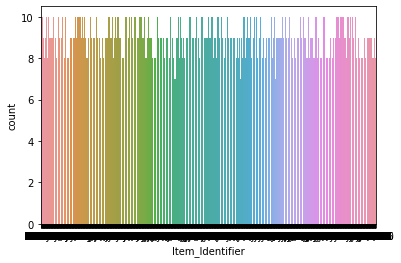

In [20]:
sns.countplot(x="Item_Identifier",data=Data)

In [21]:
Data.Item_Weight.describe()

count    14204.000000
mean        12.792847
std          4.234354
min          4.555000
25%          9.300000
50%         12.850000
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce4c9bf2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce4c9b08e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce4c9c3fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce4c9a1eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce4c99d1f0>],
 'means': []}

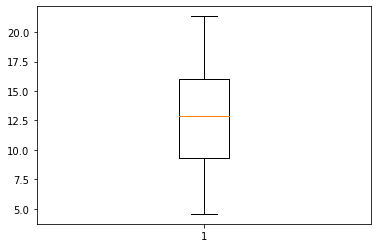

In [22]:
plt.boxplot(Data.Item_Weight)

(array([ 820., 1496., 1440., 1176., 3683., 1022., 1275., 1189., 1094.,
        1009.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

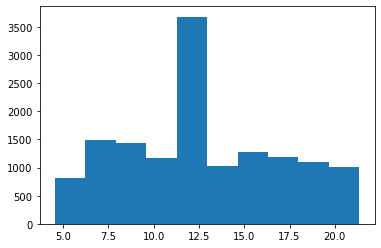

In [23]:
plt.hist(Data.Item_Weight)

In [24]:
stats.shapiro(data.Item_Weight)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9670854806900024, pvalue=3.7506422487402397e-34)

In [25]:
Data.Item_Fat_Content.describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

In [26]:
Data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [27]:
Data.Item_Fat_Content=Data.Item_Fat_Content.replace(["Low Fat","low fat"],"LF")
Data.Item_Fat_Content=Data.Item_Fat_Content.replace(["Regular"],"reg")

In [28]:
Data.Item_Fat_Content.value_counts()

LF     9185
reg    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

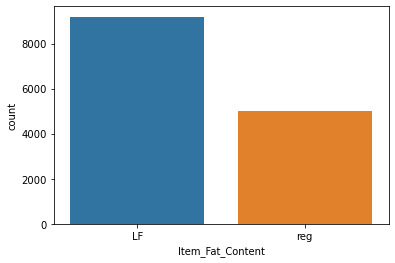

In [29]:
sns.countplot(x="Item_Fat_Content",data=Data)

In [30]:
Data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce4ffd52b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce4ffd59d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce4ffc0ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce4ffe2130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce4ffe24c0>],
 'means': []}

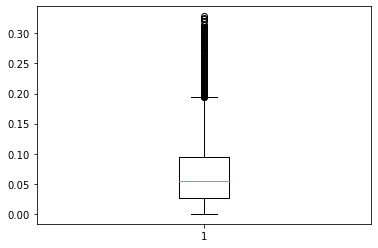

In [31]:
plt.boxplot(Data.Item_Visibility)

In [32]:
Q1=Data.Item_Visibility.quantile(0.25)
Q3=Data.Item_Visibility.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)

In [33]:
print(UE)
print(LE)

0.19453961000000003
-0.07346667400000001


In [34]:
Data.Item_Visibility[Data.Item_Visibility>UE]=UE
Data.Item_Visibility[Data.Item_Visibility<LE]=LE

C:\Users\HP\AppData\Local\Temp/ipykernel_11132/4063189763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.Item_Visibility[Data.Item_Visibility>UE]=UE
C:\Users\HP\AppData\Local\Temp/ipykernel_11132/4063189763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.Item_Visibility[Data.Item_Visibility<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x1ce5003daf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce51019250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce5003d760>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce51019970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce51019d00>],
 'means': []}

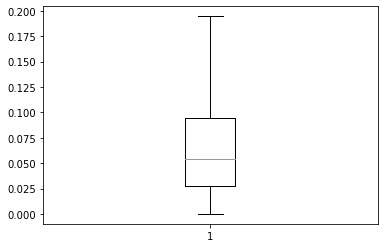

In [35]:
plt.boxplot(Data.Item_Visibility)

(array([2350., 2945., 2311., 1842., 1400., 1023.,  853.,  553.,  478.,
         449.]),
 array([0.        , 0.01945396, 0.03890792, 0.05836188, 0.07781584,
        0.09726981, 0.11672377, 0.13617773, 0.15563169, 0.17508565,
        0.19453961]),
 <BarContainer object of 10 artists>)

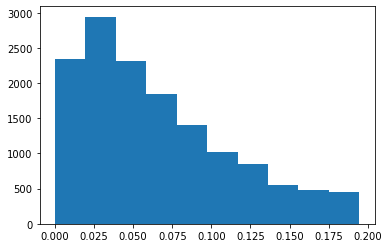

In [36]:
plt.hist(Data.Item_Visibility)

In [37]:
stats.shapiro(Data.Item_Visibility)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.930598258972168, pvalue=0.0)

In [38]:
Data.Item_Type.describe()

count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

In [39]:
Data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

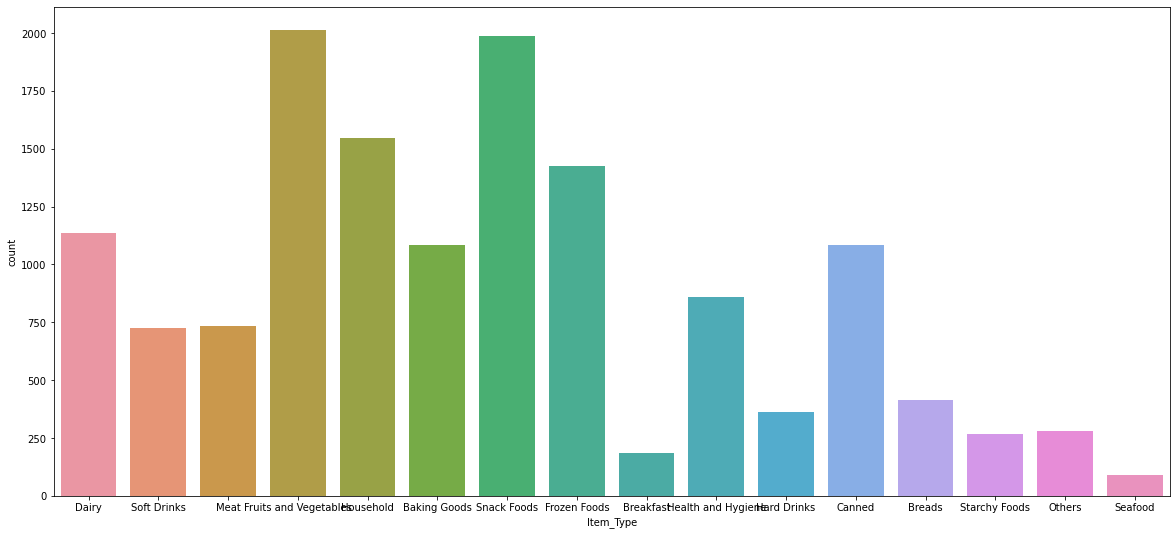

In [40]:
plt.figure(figsize=(20,9))
sns.countplot(x="Item_Type",data=Data)

In [41]:
Data.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce511ab8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce511b6040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce511ab550>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce511b6760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce511b6af0>],
 'means': []}

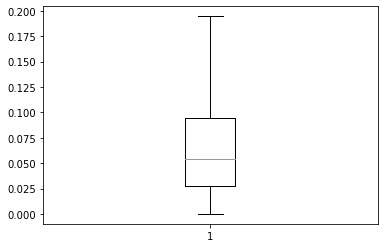

In [42]:
plt.boxplot(Data.Item_Visibility)

(array([2350., 2945., 2311., 1842., 1400., 1023.,  853.,  553.,  478.,
         449.]),
 array([0.        , 0.01945396, 0.03890792, 0.05836188, 0.07781584,
        0.09726981, 0.11672377, 0.13617773, 0.15563169, 0.17508565,
        0.19453961]),
 <BarContainer object of 10 artists>)

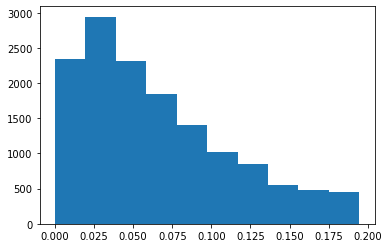

In [43]:
plt.hist(Data.Item_Visibility)

In [44]:
stats.shapiro(Data.Item_MRP)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9716830253601074, pvalue=0.0)

In [45]:
Data.Outlet_Establishment_Year.describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [46]:
Data.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

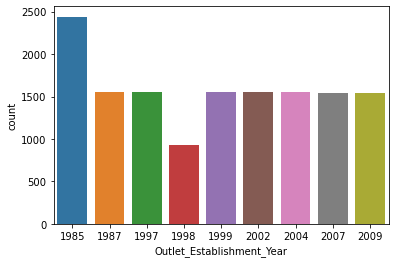

In [47]:
sns.countplot(x="Outlet_Establishment_Year",data=Data)

In [48]:
stats.shapiro(Data.Outlet_Establishment_Year)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8720644116401672, pvalue=0.0)

In [49]:
Data.Outlet_Size.describe()

count      14204
unique         3
top       Medium
freq        8671
Name: Outlet_Size, dtype: object

In [50]:
Data.Outlet_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

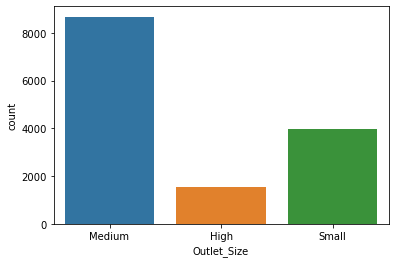

In [51]:
sns.countplot(x="Outlet_Size",data=Data)

In [52]:
Data.Outlet_Location_Type.describe()

count      14204
unique         3
top       Tier 3
freq        5583
Name: Outlet_Location_Type, dtype: object

In [53]:
Data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

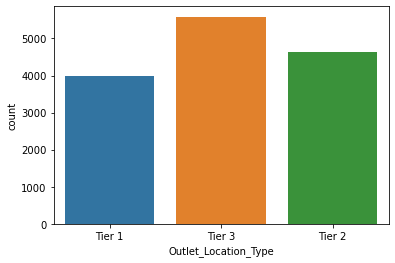

In [54]:
sns.countplot(x="Outlet_Location_Type",data=Data)

In [55]:
Data.Outlet_Type.describe()

count                 14204
unique                    4
top       Supermarket Type1
freq                   9294
Name: Outlet_Type, dtype: object

In [56]:
Data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

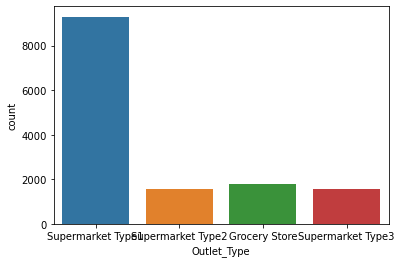

In [57]:
sns.countplot(x="Outlet_Type",data=Data)

In [58]:
Data=Data.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

In [59]:
Data=Data.astype({"Outlet_Establishment_Year":str},errors="ignore")

In [60]:
Data.shape

(14204, 9)

In [61]:
dummy=pd.get_dummies(Data)

In [62]:
dummy.shape

(14204, 40)

In [63]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      14204 non-null  float64
 1   Item_Visibility                  14204 non-null  float64
 2   Item_MRP                         14204 non-null  float64
 3   Item_Fat_Content_LF              14204 non-null  uint8  
 4   Item_Fat_Content_reg             14204 non-null  uint8  
 5   Item_Type_Baking Goods           14204 non-null  uint8  
 6   Item_Type_Breads                 14204 non-null  uint8  
 7   Item_Type_Breakfast              14204 non-null  uint8  
 8   Item_Type_Canned                 14204 non-null  uint8  
 9   Item_Type_Dairy                  14204 non-null  uint8  
 10  Item_Type_Frozen Foods           14204 non-null  uint8  
 11  Item_Type_Fruits and Vegetables  14204 non-null  uint8  
 12  Item_Type_Hard Drin

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)

In [65]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.282525,0.082489,0.927507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.099097,0.072068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.086153,0.468288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
x_tr=x1.iloc[:8523]
x_te=x1.iloc[8523:]

In [67]:
x_train,x_test,y_train,y_test= train_test_split(x_tr,y,train_size = 0.8, test_size = 0.2,random_state =50)

In [106]:
from sklearn.svm import SVC

In [107]:
svc_model=SVC(C=.1,kernel="linear",gamma=1)

In [110]:
svc_model.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [111]:
prediction=svc_model.predict(x_test)

AttributeError: 'SVC' object has no attribute 'shape_fit_'

In [112]:
svc_model.score(x_test,y_test)

AttributeError: 'SVC' object has no attribute 'shape_fit_'

In [68]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.556350777659246
Test Score = 0.5562062385810396


In [69]:
predicts=model.predict(x_test)

In [70]:
mean_squared_error(y_test,predicts,squared=False)

1126.3848506797162

In [71]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))

Train Score = 1.0
Test Score = 0.2009841801082416


In [72]:
predicts=model1.predict(x_test)

In [73]:
mean_squared_error(y_test,predicts,squared=False)

1511.3807741903743

In [74]:
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [75]:
model2.score(x_train,y_train)

0.9371357052860705

In [76]:
model2.score(x_test,y_test)

0.5748195395453264

In [77]:
predicts=model2.predict(x_test)

In [78]:
mean_squared_error(y_test,predicts,squared=False)

1102.5108022159473

In [79]:
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [80]:
model3.score(x_train,y_train)

0.6348128132944815

In [81]:
model3.score(x_test,y_test)

0.5956187241039059

In [82]:
predicts=model3.predict(x_test)

In [83]:
mean_squared_error(y_test,predicts,squared=False)

1075.2061094937856

In [84]:
result=model3.predict(x_te)

In [85]:
print(result)

[1636.83530525 1399.3387496   533.03868905 ... 1808.38093818 3738.97523619
 1282.17322955]


In [86]:
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [87]:
regress.score(x_train,y_train)

0.501569435851789

In [88]:
regress.score(x_test,y_test)

0.4853724577839019

In [89]:
predicts=regress.predict(x_test)

In [90]:
mean_squared_error(y_test,predicts,squared=False)

1212.9494922743363

In [91]:
preetha=pd.DataFrame(result)

In [92]:
actresult=pd.concat([bigTr.Item_Identifier,bigTe.Outlet_Identifier,preetha],axis=1)

In [93]:
actresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    8523 non-null   object 
 1   Outlet_Identifier  5681 non-null   object 
 2   0                  5681 non-null   float64
dtypes: float64(1), object(2)
memory usage: 199.9+ KB


In [94]:
actresult.rename(columns={0:'Item_Outlet_Sales'},inplace=True)

In [95]:
actresult.Item_Outlet_Sales[actresult.Item_Outlet_Sales<0]=-(actresult.Item_Outlet_Sales)

C:\Users\HP\AppData\Local\Temp/ipykernel_11132/150184279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actresult.Item_Outlet_Sales[actresult.Item_Outlet_Sales<0]=-(actresult.Item_Outlet_Sales)


In [96]:
actresult.to_csv('Desktop/BigMartHackathon.csv',index=True)

In [97]:
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
imp=imp.fit(bigTr[["Item_Weight"]])
bigTr[["Item_Weight"]]=imp.transform(bigTr[["Item_Weight"]])

In [98]:
bigTr.Item_Weight

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [99]:
bigTr.Item_Weight.isnull().sum()

0